In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scanpy.api as sc

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures
sc.logging.print_versions()
results_file = './write/mouse_retina_dev.h5ad'

scanpy==1.0.4+31.g29b6b1f anndata==0.5.10+1.gac08c61 numpy==1.13.1 scipy==1.0.0 pandas==0.22.0 scikit-learn==0.19.1 statsmodels==0.8.0 python-igraph==0.7.1 louvain==0.6.1 


In [2]:
adata = sc.read('./data/10x_mouse_retina_development.mtx', cache=True).T

... reading from cache file ./cache/data-10x_mouse_retina_development.h5ad


In [3]:
sc.pp.subsample(adata, fraction=0.5)

In [4]:
sc.pp.recipe_zheng17(adata)

running recipe zheng17
    finished (0:00:06.57)


In [5]:
sc.pp.subsample(adata, fraction=0.5)

In [6]:
sc.pp.pca(adata)

In [7]:
sc.pp.neighbors(adata)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:11.62) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix


In [8]:
sc.tl.umap(adata)

computing UMAP
    finished (0:00:23.15) --> added
    'X_umap', UMAP coordinates (adata.obsm)


In [11]:
sc.tl.louvain(adata)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:06.87) --> found 18 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)


In [13]:
sc.tl.paga(adata)

running partition-based graph abstraction (PAGA)
    finished (0:00:00.75) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/confidence', confidence adjacency (adata.uns)
    'paga/confidence_tree', confidence subtree (adata.uns)


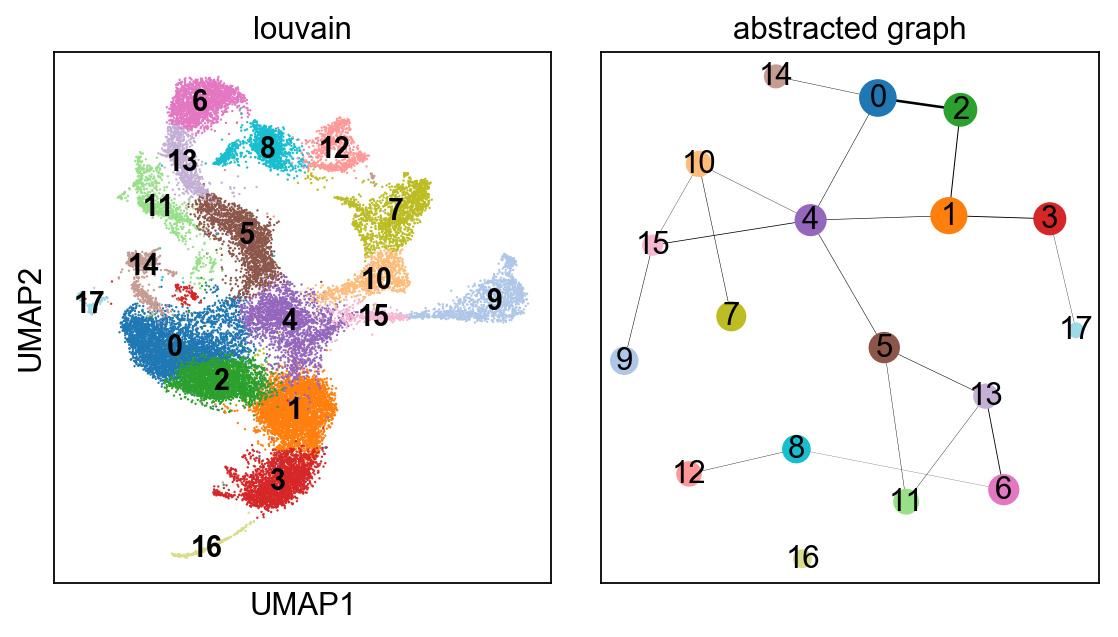

In [3]:
sc.pl.paga_compare(adata, threshold=0.011, basis='umap')

In [25]:
sc.tl.draw_graph(adata, layout='fa2')

drawing single-cell graph using layout "fa2"
    finished (0:04:58.26) --> added
    'X_draw_graph_fa2', graph_drawing coordinates (adata.obs)


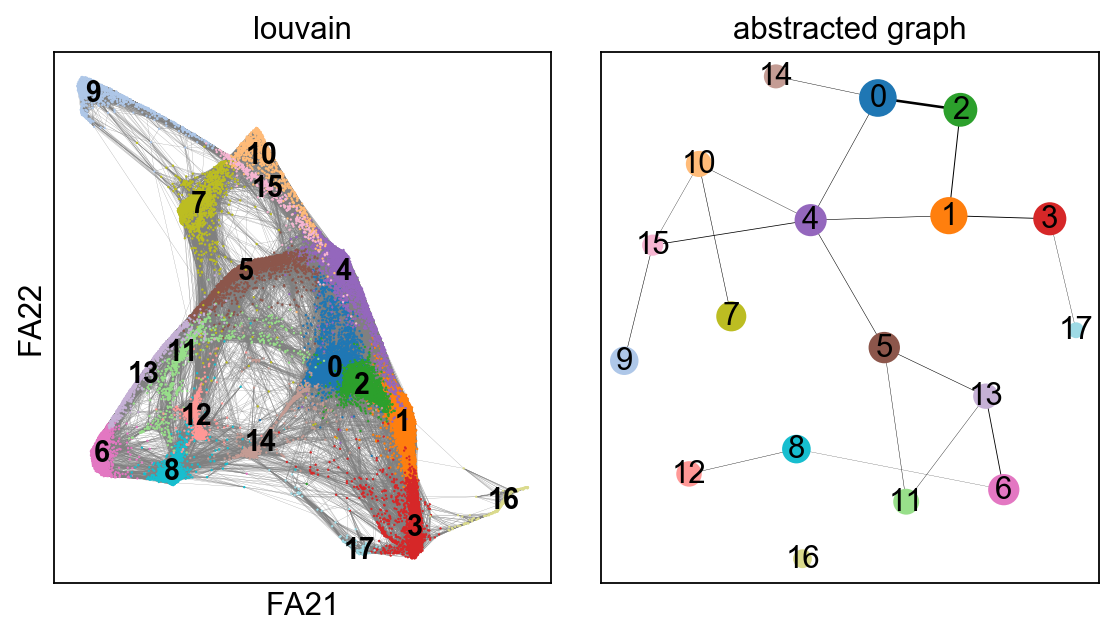

In [26]:
sc.pl.paga_compare(adata, threshold=0.011, basis='draw_graph_fa2')

In [28]:
adata.write(results_file)

In [4]:
sc.pp.neighbors(adata, n_neighbors=5)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:08.08) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix


In [6]:
sc.tl.draw_graph(adata, layout='fa2')

drawing single-cell graph using layout "fa2"
    finished (0:04:57.03) --> added
    'X_draw_graph_fa2', graph_drawing coordinates (adata.obs)


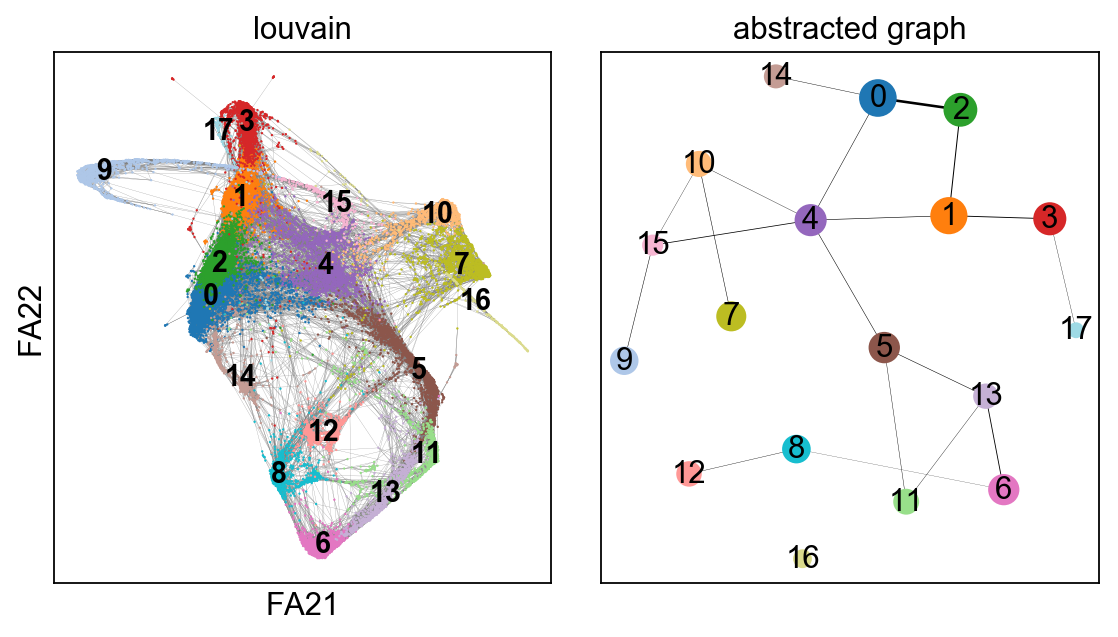

In [7]:
sc.pl.paga_compare(adata, threshold_solid=0.011, basis='draw_graph_fa2')